In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from time import sleep
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns


sc = SparkContext.getOrCreate()
spark = SparkSession(sc)


In [2]:
df = spark.read.load('C:\\Users\\luca\\Desktop\\Pippo\\DbRidotto.csv', format ="csv", sep =",", header=True)

In [3]:
df.createOrReplaceTempView("DbRidotto")

In [4]:
spark.sql("SELECT * FROM DbRidotto").show()

+---+--------------------------+-----+-------------------+------------------------+------------------+--------------------------+-------------------+-------------------+-------------------------------+---------------------------------+------------------------+-------------------------------+-----------------+--------------------+---------------------------------+-----------------+
|_c0|picco_pressione_velocita_1|Turno|picco_coppia_finale|picco_portata_velocita_1|       Temperatura|media_pressione_velocita_1|media_coppia_finale|           Data_ora|media_portata_velocita_a_regime|picco_pressione_velocita_a_regime|media_portata_velocita_1|picco_portata_velocita_a_regime|        Programma|               esito|media_pressione_velocita_a_regime|     Coefficiente|
+---+--------------------------+-----+-------------------+------------------------+------------------+--------------------------+-------------------+-------------------+-------------------------------+-------------------------------

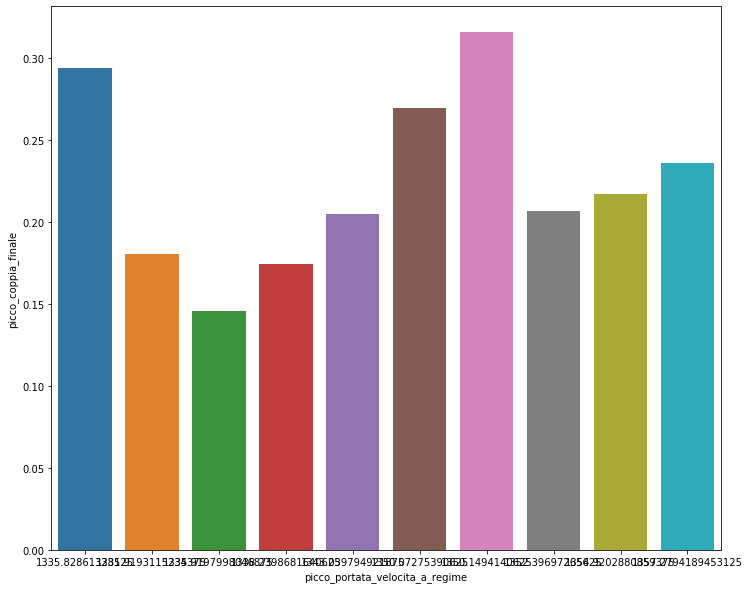

None

KeyboardInterrupt: 

In [7]:
while True:
    display.clear_output(wait=True)
    df_top = spark.sql("SELECT picco_portata_velocita_a_regime,picco_coppia_finale FROM DbRidotto LIMIT 10")
    df_top_pd = df_top.toPandas()
    plt.figure(figsize=(12,10))
    sns.barplot(x="picco_portata_velocita_a_regime", y="picco_coppia_finale", data=df_top_pd)
    display.display(plt.show())    
    sleep(1)